### The data is Having course Review and Labels  . Label 1 is for a bad course and 5 is a good course 

In [1]:
import numpy as np 
import pandas as pd


In [2]:
data=pd.read_csv("reviews_by_course.csv")      # getting the data into python program (Coursera courses with labels)

In [3]:
 courses=[]
courses=data["CourseId"].unique()         # saving the course names

In [4]:
courses[1:100]

array(['20cnwm', '2d-cad', '3d-cad', '3d-printing',
       '3d-printing-applications', '3d-printing-revolution',
       '3d-printing-software', 'a-programar', 'abdomen-anatomy',
       'ableton-live', 'aboriginal-education',
       'academic-discussion-english', 'academic-literacy',
       'academic-writing-capstone', 'academicinfoseek',
       'accounting-analytics', 'accounting-finance',
       'accounting-for-managers', 'activism-social-movements',
       'activismo-movimientos-sociales', 'addiction-and-the-brain',
       'adhd-treatment', 'adjective-clauses',
       'administracion-de-proyectos-capstone',
       'administracion-estrategica', 'admonfinanciera',
       'advanced-algorithms-and-complexity', 'advanced-calculus',
       'advanced-chemistry', 'advanced-competitive-strategy',
       'advanced-competitive-strategy-zh', 'advanced-data-structures',
       'advanced-excel', 'advanced-manufacturing-enterprise',
       'advanced-manufacturing-process-analysis', 'advanced-modeli

In [5]:
len(courses)    # getting the number of courses

1835

In [6]:
data.describe()

,Label
count,140320.000000
mean,4.619185
std,0.821347
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
from sklearn.utils import shuffle

In [8]:
df=pd.DataFrame(data)

In [9]:
df=shuffle(df)    # to randomize the data and select just 10000 rows of  1 lakh rows

In [10]:
data.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [11]:
df.head()

,CourseId,Review,Label
139864,xin-li-xue-sheng-huo,老师讲解很详细，专业术语和例子也很能让人明白,5
6652,aprender,ótimo,5
112518,python-data,The faculty is really cool and has an excellen...,5
35071,finance-for-non-finance-managers,good. but a bit too basic,5
94717,origensdavida,Curso muito bom! Recomendo a todos. Não sou da...,5


In [12]:
# import random
# random.shuffle(data)
# get only few rows for analysis 

shortDf=df[:10000]           # selecting a slice

In [13]:
# df=pd.DataFrame(data)

In [14]:
shortDf.isnull().sum()       # check for null values

CourseId    0
Review      0
Label       0
dtype: int64

In [15]:
# shortDf.dropna()       # to remove null rows

In [16]:
shortDf.insert(0, 'SNo', range(0,len(shortDf)))     # adding a serial no column

In [17]:
shortDf.shape                                    

(10000, 4)

In [18]:
courses=shortDf['CourseId'].unique()               # getting name of all courses
print(len(courses))
courses


1242


array(['xin-li-xue-sheng-huo', 'aprender', 'python-data', ...,
       'blended-learning', 'aids-fear-hope', 'arts-heritage'], dtype=object)

### Removing Non English Reviews

In [19]:
# from enchant.checker import SpellChecker               # for removing non english text reviews 

# def is_in_english(quote):
#     d = SpellChecker("en_US")
#     d.set_text(quote)
#     errors = [err.word for err in d]
#     return False if ((len(errors) > 4) or len(quote.split()) < 3) else True


In [20]:
import enchant 
# dictionary =enchant.Dict("en_US")
def is_in_english_second_approach(quote):  # faster removal of non english reviews
    dictionary =enchant.Dict("en_US")
    return dictionary.check(quote)

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize         

In [22]:
# egwords=word_tokenize(shortDf.iloc[0][2])[0]
# egwords

In [23]:
# word=word_tokenize(shortDf.iloc[0][2])[0]
# word

In [27]:
print(shortDf.iloc[0][2])                 

老师讲解很详细，专业术语和例子也很能让人明白


In [28]:
# def remove_rows(shortDf):          # to remove review not in english 
#     row=shortDf.size
#     for i in range(10000) :
#         word=word_tokenize(shortDf.iloc[i][2])[0] # checking first word of each review to see if its in english 
#         if word=="":
#             shortDf.drop(shortDf.index[i])
#         elif is_in_english_second_approach(word)==False:
#             shortDf.drop(shortDf.index[i])
        
        

In [29]:
wordsforReference=[]
for i in range(10000):
    wordsforReference.append(word_tokenize(shortDf.iloc[i][2])[0])

wordsforReference  # getting all first words of review to see if in english

['老师讲解很详细，专业术语和例子也很能让人明白',
 'ótimo',
 'The',
 'good',
 'Curso',
 'Good',
 'Totally',
 'it',
 'Very',
 'waste',
 '对于初学及入门者来说非常棒的课程！',
 'A',
 'Good',
 'Great',
 'Excellent',
 'I',
 'I',
 'Good',
 'Excellent',
 'A',
 'Excelent',
 'El',
 'This',
 'great',
 'Professional',
 'I',
 'A',
 'It',
 'Genial',
 'Very',
 'Thank',
 'Great',
 'Отличный',
 'I',
 'Muy',
 'nice',
 'Great',
 'Great',
 'i',
 'Very',
 'Very',
 'A',
 'Teaching',
 'Enjoyed',
 'There',
 'I',
 'Brilliant',
 'It',
 'This',
 'Quite',
 'Completing',
 'Nice',
 '¡Excelente',
 'Great',
 'it',
 'Good',
 'Demoro',
 'I',
 'Great',
 'Loved',
 'Awesome',
 'He',
 'Subject',
 'Really',
 'Very',
 'very',
 'Gran',
 'Nice',
 'A',
 'Thank',
 'Very',
 'Best',
 'Really',
 'Awesome',
 'Excelente',
 'Good',
 'Realy',
 'Pretty',
 'Very',
 'I',
 'Excelente',
 'The',
 'I',
 'This',
 'Well',
 'Good',
 'На',
 'I',
 'My',
 'Very',
 'This',
 'Las',
 'Excellent',
 'I',
 'Great',
 'The',
 'Amazing',
 'Excellent',
 'Simplemente',
 'As',
 'Highly',
 'Excelent

In [31]:
indexes_to_drop=[]                               # getting the indexes where review are not in english
for i in range(10000):
    if is_in_english_second_approach(wordsforReference[i])==False:
        indexes_to_drop.append(i)
        
        
        
indexes_to_drop

[0,
 1,
 4,
 10,
 20,
 32,
 34,
 52,
 56,
 74,
 76,
 80,
 86,
 98,
 101,
 103,
 107,
 110,
 112,
 121,
 122,
 127,
 136,
 138,
 142,
 144,
 156,
 159,
 168,
 174,
 178,
 186,
 187,
 198,
 203,
 232,
 238,
 241,
 243,
 244,
 246,
 252,
 254,
 261,
 265,
 277,
 282,
 285,
 291,
 293,
 300,
 306,
 313,
 314,
 315,
 324,
 325,
 326,
 343,
 345,
 346,
 351,
 356,
 358,
 366,
 370,
 372,
 380,
 387,
 390,
 395,
 419,
 423,
 424,
 426,
 429,
 432,
 436,
 441,
 445,
 448,
 450,
 453,
 454,
 457,
 460,
 466,
 468,
 475,
 477,
 478,
 485,
 488,
 496,
 505,
 509,
 511,
 514,
 538,
 546,
 548,
 550,
 552,
 556,
 557,
 560,
 578,
 582,
 586,
 592,
 594,
 601,
 602,
 613,
 619,
 624,
 629,
 639,
 640,
 654,
 659,
 660,
 663,
 670,
 681,
 685,
 687,
 692,
 698,
 700,
 702,
 704,
 710,
 731,
 734,
 750,
 763,
 765,
 782,
 804,
 806,
 817,
 819,
 826,
 830,
 840,
 841,
 862,
 865,
 869,
 873,
 882,
 883,
 899,
 905,
 908,
 919,
 938,
 943,
 953,
 954,
 966,
 969,
 970,
 989,
 998,
 1015,
 1019,
 1022,


In [32]:
indexes_to_keep = set(range(shortDf.shape[0])) - set(indexes_to_drop)
df_sliced = shortDf.take(list(indexes_to_keep))                         # it is much faster to create a new Dataframe than to drop

In [33]:
len(df_sliced)

8574

In [34]:
df_sliced=df_sliced.drop(columns=["SNo"])            # reindexing

In [35]:
df_sliced.shape

(8574, 3)

In [36]:
df_sliced.insert(0, 'SNo', range(0,df_sliced.shape[0]))

In [37]:
df_sliced.iloc[0]

SNo                                                         0
CourseId                                          python-data
Review      The faculty is really cool and has an excellen...
Label                                                       5
Name: 112518, dtype: object

In [38]:
courses[1:100]

array(['aprender', 'python-data', 'finance-for-non-finance-managers',
       'origensdavida', 'html-css-javascript-for-web-developers',
       'meeting-investors-goals', 'perfect-tenses-modals',
       'marketing-analytics', 'marketing-channels', 'c-chengxu-sheji',
       'machine-learning', 'forensic-accounting', 'interest-rate-models',
       'producing-music', 'early-vertebrate-evolution',
       'advanced-calculus', 'data-scientists-tools',
       'nurture-market-strategies', 'strategy-formulation',
       'videojuegos-diseno', 'competitive-strategy', 'diabetes',
       'ml-regression', 'quantitative-methods', 'jazz-improvisation',
       'roboty-arduino', 'gestionempresarialpyme', 'art-of-negotiation',
       'supply-chain-management', 'camera-control', 'teoriya-grafov',
       'english-principles', 'administracion-estrategica',
       'tricky-english-grammar', 'clinical-research', 'r-programming',
       'html-css-javascript', 'sustainable-development', 'brand-new-brand',
       

### Making the feature set of words 

In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [40]:
from nltk.corpus import wordnet

In [41]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))

In [42]:
allCourseReview=[]                               # getting all the course reviews in a single array 
def get_all_course_review(df_sliced):
    for review in df_sliced["Review"]:
        allCourseReview.append(review)
        
get_all_course_review(df_sliced)

In [43]:
all_words=[]                                    # tokenizing each review
def get_words_from_sentence(all_words):
    word=[]
    for sentence in allCourseReview:
        word=word_tokenize(sentence)
        all_words.append(word)
get_words_from_sentence(all_words)


In [44]:
all_words[0]

['The',
 'faculty',
 'is',
 'really',
 'cool',
 'and',
 'has',
 'an',
 'excellent',
 'way',
 'of',
 'explaining',
 'concepts',
 '.',
 'Content',
 'is',
 'also',
 'practical',
 'and',
 'useful',
 '.',
 'I',
 'am',
 'enjoying',
 'the',
 'course',
 'very',
 'much',
 '.']

In [45]:
# documents = []
# for index in range(df_sliced.shape[0]):
#     label=df_sliced.iloc[index][3]
#     sentence=all_words[index]
#     for words in sentence:
#         documents.append((words,label))
        

In [47]:
doc=[]                                            # relating each review to its label 
for index in range(df_sliced.shape[0]):
    label=df_sliced.iloc[index][3]
    currentReview=all_words[index]
    doc.append((currentReview,label))

In [48]:
doc[0]
   

(['The',
  'faculty',
  'is',
  'really',
  'cool',
  'and',
  'has',
  'an',
  'excellent',
  'way',
  'of',
  'explaining',
  'concepts',
  '.',
  'Content',
  'is',
  'also',
  'practical',
  'and',
  'useful',
  '.',
  'I',
  'am',
  'enjoying',
  'the',
  'course',
  'very',
  'much',
  '.'],
 5)

In [49]:
wordArray=[]                                      # getting individual words from reviews
for sentence in all_words:
    for word in sentence:
        wordArray.append(word.lower())
        
wordArray

['the',
 'faculty',
 'is',
 'really',
 'cool',
 'and',
 'has',
 'an',
 'excellent',
 'way',
 'of',
 'explaining',
 'concepts',
 '.',
 'content',
 'is',
 'also',
 'practical',
 'and',
 'useful',
 '.',
 'i',
 'am',
 'enjoying',
 'the',
 'course',
 'very',
 'much',
 '.',
 'good',
 '.',
 'but',
 'a',
 'bit',
 'too',
 'basic',
 'good',
 'course',
 ',',
 'i',
 'liked',
 'the',
 'delivery',
 '!',
 '!',
 '!',
 'totally',
 'worth',
 'it',
 '!',
 'excellent',
 '!',
 'it',
 'is',
 'very',
 'useful',
 'course',
 '..',
 'thank',
 'you',
 'my',
 'teachers',
 'very',
 'much',
 'very',
 'good',
 'in',
 'case',
 'if',
 'you',
 'are',
 'working',
 'in',
 'marketing',
 ',',
 'web',
 'analytics',
 '.',
 'waste',
 'of',
 'time',
 '.',
 'a',
 'marvelous',
 'course',
 '!',
 'the',
 'professor',
 'explained',
 'everything',
 'clearly',
 '.',
 'i',
 'learnt',
 'a',
 'lot',
 'and',
 'found',
 'it',
 'interesting',
 '!',
 'good',
 'overview',
 'of',
 'topic',
 '.',
 'videos',
 'well',
 'presented',
 '.',
 'poorl

In [50]:
clean_words=[]                                              # removing unnecesary words
stops.update(".", "?", "(", ")", ",", "-", "'", '"',"!","...",";","course","'s")
for w in wordArray:
    if w.lower() not in stops:
        clean_words.append(w.lower())

In [51]:
import nltk

In [52]:
clean_words = nltk.FreqDist(clean_words)                           # getting the most common words
clean_words.most_common(15)

[('course', 6155),
 ('great', 1841),
 ('good', 1671),
 ('really', 1000),
 ('excellent', 911),
 ('learning', 797),
 ('lot', 760),
 ('well', 708),
 ("'s", 689),
 ('would', 651),
 ('learn', 611),
 ('much', 606),
 ('interesting', 587),
 ('thank', 535),
 ('useful', 532)]

In [53]:
word_features = []                            
most_common = clean_words.most_common()

In [54]:
for i in range(3000):                             # selecting 3000 most common words as features
    word_features.append(most_common[i][0])

In [55]:
len(word_features)

3000

In [56]:
word_features[1:10]

['great',
 'good',
 'really',
 'excellent',
 'learning',
 'lot',
 'well',
 "'s",
 'would']

In [57]:
def find_features(review):                     # it is a kind of heatmap to tell if a review contains any of the most common words 
    words = set(review)
    features = {}                                # the dictionary is true for words which are present in the review
    for w in word_features:
        features[w] = (w in words)             # check if a current most common word is in the current Review 
    return features

In [58]:
features = find_features(all_words[11])#  for a single document 

In [59]:
features

{'course': False,
 'great': True,
 'good': True,
 'really': False,
 'excellent': False,
 'learning': False,
 'lot': False,
 'well': False,
 "'s": False,
 'would': False,
 'learn': False,
 'much': False,
 'interesting': False,
 'thank': False,
 'useful': False,
 'like': False,
 'one': False,
 'way': False,
 'easy': False,
 "n't": False,
 'understand': False,
 'also': False,
 'assignments': False,
 'courses': False,
 'knowledge': False,
 'best': False,
 'material': False,
 'time': False,
 'thanks': False,
 ':': False,
 'content': False,
 'programming': False,
 'information': False,
 'learned': False,
 'helpful': False,
 'recommend': False,
 'professor': False,
 'introduction': False,
 'lectures': False,
 'nice': False,
 'concepts': False,
 'get': False,
 'videos': False,
 'de': False,
 'class': False,
 'enjoyed': False,
 'clear': False,
 'new': False,
 'work': False,
 'awesome': False,
 '...': False,
 'could': False,
 'python': False,
 'better': False,
 'basic': False,
 'many': False,
 '

In [60]:
featuresets = [(find_features(review), label) for (review,label) in doc]# for multiple documents 

In [61]:
featuresets[5]

({'course': False,
  'great': False,
  'good': True,
  'really': False,
  'excellent': False,
  'learning': False,
  'lot': False,
  'well': False,
  "'s": False,
  'would': False,
  'learn': False,
  'much': False,
  'interesting': False,
  'thank': False,
  'useful': False,
  'like': False,
  'one': False,
  'way': False,
  'easy': False,
  "n't": False,
  'understand': False,
  'also': False,
  'assignments': False,
  'courses': False,
  'knowledge': False,
  'best': False,
  'material': False,
  'time': False,
  'thanks': False,
  ':': False,
  'content': False,
  'programming': False,
  'information': False,
  'learned': False,
  'helpful': False,
  'recommend': False,
  'professor': False,
  'introduction': False,
  'lectures': False,
  'nice': False,
  'concepts': False,
  'get': False,
  'videos': False,
  'de': False,
  'class': False,
  'enjoyed': False,
  'clear': False,
  'new': False,
  'work': False,
  'awesome': False,
  '...': False,
  'could': False,
  'python': False,

In [62]:
training_set = featuresets[:1500]
testing_set = featuresets[1500:]

In [63]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [64]:
nltk.classify.accuracy(classifier, testing_set)

0.68928470455188018

In [65]:
classifier.show_most_informative_features(15)       # this shows if a word is 5 it means pretty good course and if a word is 1 it is very bad course

Most Informative Features
                    poor = True                1 : 5      =     83.0 : 1.0
                  worked = True                2 : 5      =     75.9 : 1.0
                 nothing = True                2 : 5      =     75.9 : 1.0
               impressed = True                2 : 5      =     75.9 : 1.0
                    quiz = True                1 : 5      =     64.0 : 1.0
                   least = True                1 : 5      =     59.3 : 1.0
                 missing = True                1 : 5      =     59.3 : 1.0
                 talking = True                2 : 5      =     54.2 : 1.0
                  master = True                2 : 5      =     54.2 : 1.0
                  rather = True                2 : 5      =     54.2 : 1.0
                    paid = True                2 : 5      =     54.2 : 1.0
                  deeply = True                2 : 5      =     54.2 : 1.0
                 answers = True                1 : 5      =     49.8 : 1.0

In [66]:
classifier.classify(features)        # probably a multiclass classifier would be better for a range in between 1 to 5 

5

In [67]:
classifier.classify(features)          # Testing positive and negetives  11th review is negetive and 1 st is positive 

5

In [68]:
doc[27]

(['I',
  'love',
  'this',
  'course',
  '!',
  'Wanted',
  'to',
  'say',
  'Thank',
  'you',
  'to',
  'our',
  'teachers',
  'of',
  'this',
  'course',
  '!',
  'Something',
  'i',
  'already',
  'knew',
  'and',
  'something',
  'was',
  'really',
  'interesting',
  'and',
  'new',
  'for',
  'me',
  ':',
  ')',
  'Nice',
  'course',
  'and',
  'Awesome',
  '(',
  'with',
  'the',
  'capital',
  'A',
  ',',
  'of',
  'course',
  ')',
  'teachers',
  ':',
  ')'],
 5)

In [69]:
features=find_features(all_words[27])

In [70]:
classifier.classify(features)

5

In [71]:
import pickle

In [72]:
save_classifier = open("naivebayes.pickle", "wb")              # Saving the current classifier 
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [73]:
classifier_new = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_new)
classifier_new.close()

### The classifier gives 1 to reviews with label 1 but it gives 5 to all other reviews as it is a single class classifier .

#### To resolve this well have to try some other algorithm other than Naive bayes. 

pearson score

In [74]:
# #Dictionary of People rating for fruits
# choices={'John': {'Mango':4.5, 'Banana':3.5, 'Strawberry':4.0, 'Pineapple':4.0},
# 'Nick': {'Mango':4.0, 'Orange':4.5, 'Banana':3.0, 'Pineapple':4.5},
# 'Martha': {'Orange':5.0, 'Banana':2.5, 'Strawberry':4.5, 'Apple':3.5},
# 'Mathew': {'Mango':3.75, 'Strawberry':4.25, 'Apple':3.5, 'Pineapple':3.0}}
 

In [77]:
# from math import sqrt
# #Finding Similarity among people using Eucledian Distance Formula
# class testClass():
#     def pearson(self, cho, per1, per2):
#         #Will set the following dictionary if data is common for two persons
#         sample_data={}
#         #Above mentioned varibale is an empty dictionary, that is length =0
 
#         for items in cho[per1]:
#             if items in cho[per2]:
#                 sample_data[items]=1
#                 #Value is being set 1 for those items which are same for both persons
 
#         #Calculating length of sample_data dictionary
#         length = len(sample_data)
#         #If both person does not have any similarity or similar items return 0
#         if length==0: return 0
 
#         #Remember one thing we will calculate all the below values only for common items
#         #   or the items which are being shared by both person1 and person2, that's why
#         #   we will be using sample_data dictionary in below loops 
 
#         #Calculating Sum of all common elements for Person1 and Person2
#         sum1=sum([cho[per1][val] for val in sample_data])
#         sum2=sum([cho[per2][val] for val in sample_data])
 
#         #Calculating Sum of squares of all common elements for both
#         sumSq1=sum([pow(cho[per1][val],2) for val in sample_data])
#         sumSq2=sum([pow(cho[per2][val],2) for val in sample_data])
 
#         #Calculating Sum of Products of all common elements for both
#         sumPr=sum([cho[per1][val]*cho[per2][val] for val in sample_data])
 
#         #Calculating Person Correlation Score
#         x = sumPr-(sum1*sum2/length)
#         y = sqrt((sumSq1-pow(sum1,2)/length)*(sumSq2-pow(sum2,2)/length))
 
#         if y==0 : return 0
 
#         return(x/y)
#         #Value being returned above always lies between -1 and 1
#         #Value of 1 means maximum similarity
 
# def main():
#     ob = testClass()
 
#     print(ob.pearson(choices, 'John', 'Nick'))
#     print(ob.pearson(choices, 'John', 'Martha'))
#     print(ob.pearson(choices, 'John', 'John'))
 
# if __name__ == "__main__":
#     main()


In [78]:
import pandas as pd

In [79]:
datatoRead=pd.read_excel("Untitled spreadsheet (1).xlsx")

In [80]:
datatoRead

,Name,Year Currently Studying in,Difficulty level of Course,Length of Course(in months),Certificate Needed,object-oriented-java',robotics-motion-planning',html-css-javascript-for-web-developers',python-data-processing',data-scientists-tools',internet-of-things-communication',build-data-science-team',interactive-python-1,learn-to-program,ruby-on-rails-intro,python-data'
0,AKSHITA AGGARWAL,2,beginner,5,yes,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,AMAN,3,professional,5,no,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
2,AMIT RAWAT,2,intermediate,2,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,ANMOL BISWAS,2,intermediate,1,no,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,ASHWIN GIRI,2,beginner,2,yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,GAURI VERMA,1,professional,3,no,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,HARDIK GOTHWAL,2,beginner,3,no,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
7,MUSKAN PALIWAL,4,beginner,3,yes,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8,PAWAN THAPA,4,intermediate,1,yes,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
9,PRIYA JAIN,2,professional,4,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0


enter qualificationfi
get coursesd


### Trying out the clustering algorithm 

In [15]:
# import statements
# from sklearn.datasets import make_blobs
# import numpy as np
# import matplotlib.pyplot as plt
# # create blobs
# data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# # create np array for data points
# points = data[0]
# # create scatter plot
# plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
# plt.xlim(-15,15)
# plt.ylim(-15,15)

(-15, 15)

In [16]:
# data[0]

array([[ -1.06705283e+00,   9.24306355e+00],
       [  1.08654318e+00,  -6.94815805e+00],
       [ -2.30970265e+00,   5.84969440e+00],
       [ -1.59728965e+00,   8.45369045e+00],
       [ -5.79816711e+00,  -3.78405528e+00],
       [ -2.29833776e+00,  -4.66005371e+00],
       [ -1.68210799e+00,   1.12843423e+01],
       [ -7.38296450e-01,  -5.20135260e+00],
       [ -1.92048345e-01,  -6.45318764e+00],
       [ -6.37920287e+00,  -2.17672355e+00],
       [ -5.12054803e+00,  -2.91449176e+00],
       [ -4.22297649e+00,   9.04719945e+00],
       [ -2.67815731e+00,  -2.32828819e+00],
       [ -3.02994109e+00,   1.86959382e+00],
       [ -5.73938121e+00,  -7.25648845e-01],
       [ -1.99427571e+00,   4.28616868e+00],
       [ -2.89522086e+00,   1.10222354e+01],
       [ -1.11286937e+00,   1.03086380e+01],
       [ -5.19987051e+00,  -1.59879364e+00],
       [ -4.75916597e+00,  -1.97047767e+00],
       [ -6.76865308e+00,  -3.56907573e+00],
       [ -2.65715781e+00,   3.33763714e+00],
       [ -

In [4]:
# import KMeans
# from sklearn.cluster import KMeans

In [5]:
# # create kmeans object
# kmeans = KMeans(n_clusters=4)
# # fit kmeans object to data
# kmeans.fit(points)
# # print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# # save new clusters for chart
# y_km = kmeans.fit_predict(points)

[[  0.05161133  -5.35489826]
 [ -1.92101646   5.21673484]
 [ -5.56465793  -2.34988939]
 [ -2.40167949  10.17352695]]


In [6]:
# plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
# plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
# plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
# plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

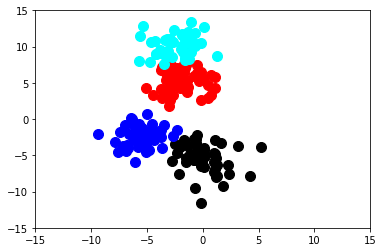

In [7]:
# plt.show()

#### Heirarchial clustering 

In [88]:
# # import hierarchical clustering libraries
# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import AgglomerativeClustering

In [89]:
# # create dendrogram
# dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# # create clusters
# hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# # save clusters for chart
# y_hc = hc.fit_predict(points)

In [90]:
# plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
# plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
# plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
# plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')


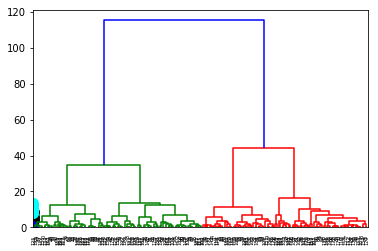

In [91]:
plt.show()

In [81]:
def getLevelColumn(str):
    if(str=="beginner"):
        return 1
    elif(str=="intermediate"):
        return 2
    else :
        return 3
    

In [82]:
numericalValueOfDifficultyLevel=datatoRead["Difficulty level of Course"].apply(getLevelColumn)

In [94]:
# datatoRead.append(numericalValueOfDifficultyLevel)

In [83]:
datatoRead['NumericalDifficultyLevelOfCourse']=numericalValueOfDifficultyLevel

In [84]:
datatoRead

,Name,Year Currently Studying in,Difficulty level of Course,Length of Course(in months),Certificate Needed,object-oriented-java',robotics-motion-planning',html-css-javascript-for-web-developers',python-data-processing',data-scientists-tools',internet-of-things-communication',build-data-science-team',interactive-python-1,learn-to-program,ruby-on-rails-intro,python-data',NumericalDifficultyLevelOfCourse
0,AKSHITA AGGARWAL,2,beginner,5,yes,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
1,AMAN,3,professional,5,no,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,3
2,AMIT RAWAT,2,intermediate,2,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2
3,ANMOL BISWAS,2,intermediate,1,no,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2
4,ASHWIN GIRI,2,beginner,2,yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
5,GAURI VERMA,1,professional,3,no,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3
6,HARDIK GOTHWAL,2,beginner,3,no,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1
7,MUSKAN PALIWAL,4,beginner,3,yes,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
8,PAWAN THAPA,4,intermediate,1,yes,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,2
9,PRIYA JAIN,2,professional,4,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3


In [88]:
def getNumericalValueofCertificate(str):
    if(str=="yes"):
        return 1
    else:
        return 0
    

In [86]:
datatoRead["NumericalValueOfCertificateNeeded"]=datatoRead['Certificate Needed'].apply(getNumericalValueofCertificate)

In [99]:
from sklearn import linear_model

In [89]:
def getScore(year,DifficultyLevel,LengthOfCOurse,CertificateNeeded):
    sumOfValues=(year/4)+(DifficultyLevel/3)+(LengthOfCOurse/5)+(CertificateNeeded)
    return sumOfValues

   


In [90]:
scores=[]
for data in datatoRead:
    scores.append(getScore(data[1],data[16],data[3],data[17]))

IndexError: string index out of range

In [87]:
for data in datatoRead:
    print(data)

Name
Year Currently Studying in
Difficulty level of Course
Length of Course(in months)
Certificate Needed
object-oriented-java'
robotics-motion-planning'
html-css-javascript-for-web-developers'
python-data-processing'
data-scientists-tools'
internet-of-things-communication'
build-data-science-team'
interactive-python-1
learn-to-program
ruby-on-rails-intro
python-data'
NumericalDifficultyLevelOfCourse
NumericalValueOfCertificateNeeded


In [91]:
rows=datatoRead.iloc[:]

In [92]:
rows

,Name,Year Currently Studying in,Difficulty level of Course,Length of Course(in months),Certificate Needed,object-oriented-java',robotics-motion-planning',html-css-javascript-for-web-developers',python-data-processing',data-scientists-tools',internet-of-things-communication',build-data-science-team',interactive-python-1,learn-to-program,ruby-on-rails-intro,python-data',NumericalDifficultyLevelOfCourse,NumericalValueOfCertificateNeeded
0,AKSHITA AGGARWAL,2,beginner,5,yes,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,1
1,AMAN,3,professional,5,no,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,3,0
2,AMIT RAWAT,2,intermediate,2,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,1
3,ANMOL BISWAS,2,intermediate,1,no,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2,0
4,ASHWIN GIRI,2,beginner,2,yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,1
5,GAURI VERMA,1,professional,3,no,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3,0
6,HARDIK GOTHWAL,2,beginner,3,no,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1,0
7,MUSKAN PALIWAL,4,beginner,3,yes,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,1
8,PAWAN THAPA,4,intermediate,1,yes,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,2,1
9,PRIYA JAIN,2,professional,4,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3,1


In [93]:
rows.iloc[2:,1]

2     2
3     2
4     2
5     1
6     2
7     4
8     4
9     2
10    4
11    4
12    4
13    3
14    4
15    4
16    2
17    2
18    2
19    4
20    4
21    4
22    2
23    4
24    4
25    1
26    4
27    3
28    4
29    3
30    2
31    3
32    1
33    3
34    3
35    2
36    2
37    2
38    2
Name: Year Currently Studying in, dtype: int64

In [94]:
dimension=datatoRead.shape

In [95]:
scores=[]
for i in range (dimension[0]):
    sumOfVal=getScore(rows.iloc[i:i+1,1],rows.iloc[i:i+1,16],rows.iloc[i:i+1,3],rows.iloc[i:i+1,17])
    scores.append(sumOfVal)

In [96]:
scoretoread=[]
for i in range(dimension[0]):
    scoretoread.append(scores[i][i])

In [97]:
datatoRead['NewScores']=scoretoread

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
datatoRead

,Name,Year Currently Studying in,Difficulty level of Course,Length of Course(in months),Certificate Needed,object-oriented-java',robotics-motion-planning',html-css-javascript-for-web-developers',python-data-processing',data-scientists-tools',internet-of-things-communication',build-data-science-team',interactive-python-1,learn-to-program,ruby-on-rails-intro,python-data',NumericalDifficultyLevelOfCourse,NumericalValueOfCertificateNeeded,NewScores
0,AKSHITA AGGARWAL,2,beginner,5,yes,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,1,2.833333
1,AMAN,3,professional,5,no,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,3,0,2.750000
2,AMIT RAWAT,2,intermediate,2,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,1,2.566667
3,ANMOL BISWAS,2,intermediate,1,no,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2,0,1.366667
4,ASHWIN GIRI,2,beginner,2,yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,1,2.233333
5,GAURI VERMA,1,professional,3,no,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3,0,1.850000
6,HARDIK GOTHWAL,2,beginner,3,no,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1,0,1.433333
7,MUSKAN PALIWAL,4,beginner,3,yes,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,1,2.933333
8,PAWAN THAPA,4,intermediate,1,yes,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,2,1,2.866667
9,PRIYA JAIN,2,professional,4,yes,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3,1,3.300000


In [100]:
from sklearn import cross_validation
clf=LinearRegression()
x_train, x_test, y_train, y_test=cross_validation.train_test_split(datatoRead, datatoRead['NewScores'], test_size=0.2)

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [101]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
y_pred

ValueError: could not convert string to float: 'yes'

In [102]:
slicedData=datatoRead['Year Currently Studying in']

In [103]:
slicedData['LengthOfCourse']=datatoRead['Length of Course(in months)']

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
slicedData['NumericalDifficulty']=datatoRead['NumericalDifficultyLevelOfCourse']

In [105]:
slicedData

0                                                                      2
1                                                                      3
2                                                                      2
3                                                                      2
4                                                                      2
5                                                                      1
6                                                                      2
7                                                                      4
8                                                                      4
9                                                                      2
10                                                                     4
11                                                                     4
12                                                                     4
13                                                 

In [106]:
sliceOfData=datatoRead.iloc[:,2]

In [107]:
newDataFiled=pd.DataFrame()

In [108]:
newDataFiled['Year']=datatoRead['Year Currently Studying in']

In [109]:
newDataFiled['Length']=datatoRead["Length of Course(in months)"]

In [110]:
newDataFiled['Difficulty']=datatoRead['NumericalDifficultyLevelOfCourse']

In [111]:
newDataFiled['Certificate']=datatoRead['NumericalValueOfCertificateNeeded']

In [112]:
newDataFiled=newDataFiled.iloc[0:39]

In [113]:
newDataFiled['score']=datatoRead['NewScores']

In [114]:
newDataFiled

,Year,Length,Difficulty,Certificate,score
0,2,5.0,1.0,1.0,2.833333
1,3,5.0,3.0,0.0,2.750000
2,2,2.0,2.0,1.0,2.566667
3,2,1.0,2.0,0.0,1.366667
4,2,2.0,1.0,1.0,2.233333
5,1,3.0,3.0,0.0,1.850000
6,2,3.0,1.0,0.0,1.433333
7,4,3.0,1.0,1.0,2.933333
8,4,1.0,2.0,1.0,2.866667
9,2,4.0,3.0,1.0,3.300000


In [115]:
x_train, x_test, y_train, y_test=cross_validation.train_test_split(newDataFiled.iloc[0:,0:4], newDataFiled['score'], test_size=0.2)

In [116]:
clf.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [117]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
y_pred

array([ 2.83333333,  1.73333333,  3.4       ,  2.93333333,  3.3       ,
        1.7       ,  1.53333333,  1.36666667])

In [118]:
y_test

0     2.833333
11    1.733333
28    3.400000
7     2.933333
9     3.300000
22    1.700000
14    1.533333
30    1.366667
Name: score, dtype: float64

### Using Cosine Similarity 

In [119]:
newDataFiled

,Year,Length,Difficulty,Certificate,score
0,2,5.0,1.0,1.0,2.833333
1,3,5.0,3.0,0.0,2.750000
2,2,2.0,2.0,1.0,2.566667
3,2,1.0,2.0,0.0,1.366667
4,2,2.0,1.0,1.0,2.233333
5,1,3.0,3.0,0.0,1.850000
6,2,3.0,1.0,0.0,1.433333
7,4,3.0,1.0,1.0,2.933333
8,4,1.0,2.0,1.0,2.866667
9,2,4.0,3.0,1.0,3.300000


In [132]:
helperArray=np.array(newDataFiled)

In [139]:
dimensionOfHelper=helperArray.shape

In [140]:
def getCosineComparisons()

39

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

In [219]:
def get2dCosineComaprisonValues(matrix):
    cosineMatrix=[]
    for i in matrix:
        currentMatrix=[]
        i=i.reshape(1,-1)
        for j in matrix :
            j=j.reshape(1,-1)
            cosValue=cosine_similarity(i,j).tolist()[0][0]
            currentMatrix.append(cosValue)
        cosineMatrix.append(currentMatrix)
    return cosineMatrix


In [220]:
cosine2dMatrix=get2dCosineComaprisonValues(helperArray)

In [205]:
cosine2dMatrix=np.array(cosine2dMatrix)

In [218]:
cosine2dMatrix[0][0][0]

1.0

### apply heirarchial clustering 

In [173]:
from scipy.cluster import  hierarchy

In [236]:
threshold = 0.001
Z = hierarchy.linkage(cosine2dMatrix,"average", metric="cosine")
Clusters = hierarchy.fcluster(Z, threshold, criterion="distance")

In [242]:
Clusters

array([ 9, 13, 14,  1, 14, 15, 12,  7,  4, 13,  4,  8, 12,  6,  5,  2,  3,
        3, 13,  4, 14, 14,  1,  6,  6, 11, 14,  6,  6,  4,  1, 12, 10, 12,
        4, 12,  2,  6, 14], dtype=int32)

In [238]:
Classes=set(Clusters)

In [ ]:
# The NO of Clusters in the cosine similarity 

In [240]:
Classes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [195]:
def getDetails():
    input("Enter name ")
    year=input("enter year of study")
    year=int(year)
    length=input("Enter length of course")
    length=int(length)
    difficulty=input("enter level of difficulty")
    difficulty=getLevelColumn(difficulty)
    certificate=input("enter yes if certificate needed")
    certificate=getNumericalValueofCertificate(certificate)
    return (year,length,difficulty,certificate)

In [196]:
testcase=getDetails()

Enter name achintya
enter year of study2
Enter length of course4
enter level of difficultybeginner
enter yes if certificate neededyes


In [197]:
testcase

(2, 4, 1, 1)

In [198]:
showval=clf.predict(testcase)

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [199]:
df_sliced

,SNo,CourseId,Review,Label
17510,0,clinical-trials,A nice and succinct overview. Even though I wa...,5
115660,1,python-network-data,It is just a great course. I recommend it to e...,5
136569,2,website-coding,Thanks a lot! That was great!,5
42344,3,gamedev-business,Really great! I wish I had spare cash for the ...,5
92998,4,neuroeconomics,Extremely clear - everything is explained from...,5
59886,5,introductiontoprobability,"Well narrated, really easy to understand. A hu...",5
127257,6,statistical-inferences,I encourage all my friends in research to not ...,5
95978,7,personal-branding,Es una profesora fantastica. El curso es muy b...,4
15297,8,chickens,I found this course to be very informative for...,5
93255,9,nonviolence,This is a great course.It is more than a histo...,5


In [200]:
def getRecommendation(score):
    scoreTofind=int(score)
    recommendation=[]
    rows=df_sliced.shape[0]
    for i in range(rows):
        if(df_sliced['Label'].iloc[i]==scoreTofind):
            recommendation.append(df_sliced['CourseId'].iloc[i])
    return recommendation

In [201]:
def getCoursesForRecommendation(score):
    recommendation=getRecommendation(score)
    recommendation=pd.DataFrame(recommendation)
    

In [202]:
array=['a','a','b','c']

In [203]:
array=pd.DataFrame(array)

In [204]:
array.drop_duplicates

<bound method DataFrame.drop_duplicates of    0
0  a
1  a
2  b
3  c>

In [205]:
array.drop_duplicates

<bound method DataFrame.drop_duplicates of    0
0  a
1  a
2  b
3  c>

In [206]:
array=np.array(array)

In [207]:
array=pd.DataFrame(array)

In [208]:
testcase=getDetails()

Enter name achintya 
enter year of study2
Enter length of course4
enter level of difficultybeginner
enter yes if certificate neededyes


In [209]:
predictineg=clf.predict(testcase)

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [210]:
getRecommendation(predictineg[0])

['data-scientists-tools',
 'marketing-plan',
 'ui-design',
 'practical-machine-learning',
 'algorithms-on-graphs',
 'analytics-excel',
 'craft-of-plot',
 'personal-branding',
 'wharton-introduction-spreadsheets-models',
 'game-design',
 'data-scientists-tools',
 'work-smarter-not-harder',
 'duke-behavioral-finance',
 'analytics-excel',
 'datasciencemathskills',
 'healthcare-medical-technology',
 'learning-how-to-learn',
 'marketing-channels',
 'regression-models',
 'decision-making',
 'robotics-flight',
 'python-plotting',
 'marketing-analytics',
 'video-game-world',
 'new-nordic-diet',
 'craft-of-character',
 'managingmoney',
 'python-capstone',
 'cyber-security-domain',
 'tesol-speaking',
 'managingmoney',
 'how-to-create-a-website',
 'duke-behavioral-finance',
 'data-visualization-tableau',
 'work-smarter-not-harder',
 'ml-foundations',
 'r-programming',
 'ml-classification',
 'develop-your-musicianship',
 'learning-how-to-learn',
 'data-cleaning',
 'designexperiments',
 'uva-darden

In [211]:
testcase=getDetails()

Enter name achintya 
enter year of study2
Enter length of course4
enter level of difficultybeginner
enter yes if certificate neededyes


In [212]:
score=clf.predict(testcase)

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [213]:
getRecommendation(score[0])


['data-scientists-tools',
 'marketing-plan',
 'ui-design',
 'practical-machine-learning',
 'algorithms-on-graphs',
 'analytics-excel',
 'craft-of-plot',
 'personal-branding',
 'wharton-introduction-spreadsheets-models',
 'game-design',
 'data-scientists-tools',
 'work-smarter-not-harder',
 'duke-behavioral-finance',
 'analytics-excel',
 'datasciencemathskills',
 'healthcare-medical-technology',
 'learning-how-to-learn',
 'marketing-channels',
 'regression-models',
 'decision-making',
 'robotics-flight',
 'python-plotting',
 'marketing-analytics',
 'video-game-world',
 'new-nordic-diet',
 'craft-of-character',
 'managingmoney',
 'python-capstone',
 'cyber-security-domain',
 'tesol-speaking',
 'managingmoney',
 'how-to-create-a-website',
 'duke-behavioral-finance',
 'data-visualization-tableau',
 'work-smarter-not-harder',
 'ml-foundations',
 'r-programming',
 'ml-classification',
 'develop-your-musicianship',
 'learning-how-to-learn',
 'data-cleaning',
 'designexperiments',
 'uva-darden

In [214]:
testcase=getDetails()

Enter name achintya
enter year of study2
Enter length of course6
enter level of difficultyintermediate
enter yes if certificate neededyes


In [215]:
score=clf.predict(testcase)

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [216]:
getRecommendation(score[0])

['positive-psychology',
 'getting-started-with-essay-writing',
 'teach-online',
 'happiness',
 'machine-learning-data-analysis',
 'brand-new-brand',
 'music-and-social-action',
 'c-plus-plus-a',
 'responsive-website-examples',
 'r-programming',
 'work-smarter-not-harder',
 'memory-and-movies',
 'importance-of-listening',
 'ml-clustering-and-retrieval',
 'wharton-introduction-spreadsheets-models',
 'psychological-first-aid',
 'work-smarter-not-harder',
 'infographic-design',
 'english-for-business-writing',
 'python-capstone',
 'calculo-1',
 'science-of-meditation',
 'wharton-introduction-spreadsheets-models',
 'managing-as-a-coach',
 'software-processes-and-agile-practices',
 'financial-markets',
 'evolvinguniverse',
 'analytics-tableau',
 'game-theory-introduction',
 'digital-analytics',
 'what-is-social',
 'android-programming',
 'managingmoney',
 'financial-markets',
 'calculus1',
 'big-data-graph-analytics',
 'pap',
 'statistical-inference',
 'internet-of-things-history',
 'iot-con

In [217]:
def mainProgram():
    test=getDetails()
    score=clf.predict(test)
    recommendation=getRecommendation(score[0])
    return recommendation[1:6]

In [220]:
mainProgram()

Enter name achintya
enter year of study2
Enter length of course4
enter level of difficultybeginner
enter yes if certificate neededyes


/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


['marketing-plan',
 'ui-design',
 'practical-machine-learning',
 'algorithms-on-graphs',
 'analytics-excel']